In [1]:
!pip install pandas

import pandas as pd
df=pd.read_csv("80_Train.csv",sep=",")



     |████████████████████████████████| 10.8 MB 4.7 MB/s eta 0:00:01    |█▍                              | 481 kB 4.7 MB/s eta 0:00:03
     |████████████████████████████████| 15.7 MB 88.1 MB/s eta 0:00:01


In [2]:
x_columns=df.columns
x = df[x_columns].values
y = df['RF'].values

In [3]:
conda install tensorflow


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              mkl           2 KB  defaults
    abseil-cpp-20200923.3      |       h2531618_0         919 KB  defaults
    absl-py-0.13.0             |     pyhd8ed1ab_0          97 KB  conda-forge
    aiohttp-3.7.4.post0        |   py37h5e8e339_0         625 KB  conda-forge
    astor-0.8.1                |     pyh9f0ad1d_0          25 KB  conda-forge
    astunparse-1.6.3           |     pyhd8ed1ab_0          15 KB  conda-forge
    async-timeout-3.0.1        |          py_1000          11 KB  conda-forge
    c

In [4]:
conda install keras

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    keras-2.4.3                |     pyhd8ed1ab_0          30 KB  conda-forge
    pyyaml-5.4.1               |   py37h5e8e339_0         189 KB  conda-forge
    yaml-0.2.5                 |       h516909a_0          82 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         302 KB

The following NEW packages will be INSTALLED:

  keras              conda-forge/noarch::keras-2.4.3-pyhd8ed1ab_0
  pyyaml             conda-forge/linux-64::pyyaml-5.4.1-py37h5e8e339_0
 

In [5]:
 conda install scikit-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.0.1               |     pyhd8ed1ab_0         206 KB  conda-forge
    scikit-learn-0.24.2        |   py37h18a542f_0         7.5 MB  conda-forge
    threadpoolctl-2.2.0        |     pyh8a188c0_0          16 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.7 MB

The following NEW packages will be INSTALLED:

  joblib             conda-forge/noarch::joblib-1.0.1-pyhd8ed1ab_0
  scikit-learn       conda-forge/linux-64::scikit-learn-0.24.2-p

In [29]:
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping


kf = KFold(5, shuffle=True, random_state=42) # Use for KFold classification
    
out_of_sample_y = []
out_of_sample_pred = []
fold = 0
for train, test in kf.split(x):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    model.add(Dense(64, input_dim=x.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)
    model.fit(x_train,y_train,validation_data=(x_test,y_test),
        callbacks=[monitor], verbose=2,epochs=1000)
    
    pred = model.predict(x_test)
    
    out_of_sample_y.append(y_test)
    out_of_sample_pred.append(pred)    

    # Measure this fold's RMSE
    score = np.sqrt(metrics.mean_absolute_error(pred,y_test))
    print(f"Fold score (MAE): {score}")
# Build the oos prediction list and calculate the error.
out_of_sample_y = np.concatenate(out_of_sample_y)
out_of_sample_pred = np.concatenate(out_of_sample_pred)




score = np.sqrt(metrics.mean_absolute_error(out_of_sample_pred,out_of_sample_y))
print(f"Final, out of sample score (RMSE): {score}")
    


Fold #1
Epoch 1/1000
2/2 - 1s - loss: 0.4276 - val_loss: 0.3689
Epoch 2/1000
2/2 - 1s - loss: 0.3891 - val_loss: 0.2511
Epoch 3/1000
2/2 - 1s - loss: 0.2661 - val_loss: 0.1857
Epoch 4/1000
2/2 - 1s - loss: 0.2264 - val_loss: 0.1657
Epoch 5/1000
2/2 - 1s - loss: 0.2570 - val_loss: 0.1571
Epoch 6/1000
2/2 - 0s - loss: 0.2149 - val_loss: 0.1473
Epoch 7/1000
2/2 - 1s - loss: 0.2314 - val_loss: 0.1322
Epoch 8/1000
2/2 - 0s - loss: 0.1833 - val_loss: 0.1257
Epoch 9/1000
2/2 - 0s - loss: 0.1943 - val_loss: 0.1331
Epoch 10/1000
2/2 - 0s - loss: 0.1792 - val_loss: 0.1569
Epoch 11/1000
2/2 - 0s - loss: 0.1664 - val_loss: 0.1690
Epoch 12/1000
2/2 - 0s - loss: 0.1509 - val_loss: 0.1652
Epoch 13/1000
2/2 - 0s - loss: 0.1845 - val_loss: 0.1441
Restoring model weights from the end of the best epoch.
Epoch 00013: early stopping
Fold score (MAE): 0.3545044057893875
Fold #2
Epoch 1/1000
2/2 - 1s - loss: 0.5545 - val_loss: 0.4243
Epoch 2/1000
2/2 - 0s - loss: 0.4113 - val_loss: 0.3250
Epoch 3/1000
2/2 - 

Text(0, 0.5, 'Predicted')

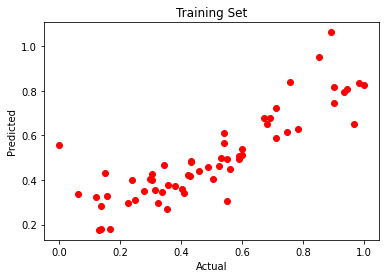

In [30]:
!pip install matplotlib
import matplotlib.pyplot as plt
resultsTest = np.genfromtxt("80_Train.csv",
 delimiter=",")
plt.plot(out_of_sample_y, #training Y value
 out_of_sample_pred, #predicted Y value
 'ro') #red dots
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [31]:
from sklearn.metrics import r2_score
testR2 = r2_score(out_of_sample_pred, out_of_sample_y)

In [32]:
print(testR2)

0.5070377023335815
